In [269]:
# 1. Coin Flip Example
#Import required libraries :

import random
import numpy as np

import scipy as sp

import matplotlib.pyplot as plt
import pymc as pm


In [310]:
def coin_flip():
    return random.randint(0,1)

def roll_dice():
    return random.randint(1,6)



In [315]:
# coin flip 10 times

sp.stats.bernoulli.rvs(0.5, size=10)

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [316]:
def coin_flip_experiment(n):
    # probability of getting heads

    events = sp.stats.bernoulli.rvs(p=0.5, size=n)
    res = 0
    prob = []
    for inx, event in enumerate(events):
        res = res + event
        prob_ = res / (inx + 1)
        prob.append(prob_)

        plt.axhline(y=0.5, color='red', linestyle='dashed')
        plt.xlabel('Number of simulations')
        plt.ylabel('Probability')
        plt.title('Monte Carlo Simulation')
        plt.plot(prob)

In [5]:
# MC simulation
prob_list = []
def monte_carlo(n):
    # n = number of simulations
    # x = number of heads
    results = 0
    for i in range(n):
        flip_result = coin_flip()
        # print("Coin result on experiment {}: {} ".format(i,flip_result))
        results = results + flip_result 
        # print("Total number of heads: {}".format(results))      

        prob_value = results/ (i+1)
        # print("Probability of heads: {}".format(prob_value))
        prob_list.append(prob_value)

        # plot the results
        plt.axhline(y=0.5, color='red', linestyle='dashed')
        plt.xlabel('Number of simulations')
        plt.ylabel('Probability')
        plt.title('Monte Carlo Simulation')
        plt.plot(prob_list)
    return prob_value/n
    

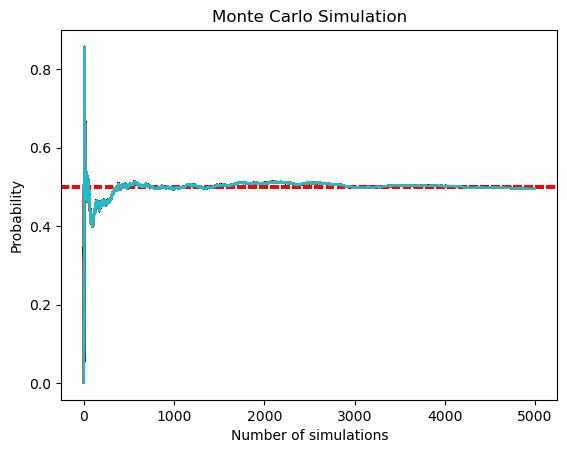

In [6]:
coin_flip_experiment(5000)


In [6]:
def dice_experiment():
    die_one = roll_dice()
    die_two = roll_dice()
    return [die_one, die_two]

In [7]:
print(dice_experiment())

[4, 1]


In [ ]:
# Gerald -> ask about Internal data

# Intervals instead of events 

# then assumption : all valves are same and collectors same

# All collectors overlaped 

In [160]:
class Valve:
    def __init__(self, name, collector):
        self.name = name
        self.collector = collector
    def __repr__(self):
        return self.name

    @staticmethod
    def get_failure(dist='possion'):
        if dist == 'possion':
            return sp.stats.poisson.rvs(mu=600, loc=400)


class Collector:
    def __init__(self, name, valves):
        self.name = name
        self.valves = valves

    def __repr__(self):
        return self.name


In [161]:
random.randint(30,100)

73

In [255]:
valve_one = Valve('Valve 1', 'Collector 1')


In [256]:
v_one_failures = []
v_two_failures = []
v_three_failures = []
v_four_failures = []
f_count = 0

In [257]:

while f_count < 10000:

    valve_one_f = valve_one.get_failure()
    valve_two_f = valve_one.get_failure()
    valve_three_f = valve_one.get_failure()
    valve_four_f = valve_one.get_failure()

    f_count += min(valve_one_f, valve_two_f, valve_three_f, valve_four_f)
    print(f_count)
    
    one_before_f = np.zeros(f-1) 
    one_wait_f = np.ones(random.randint(50,200))

    v_one_ts = np.concatenate((one_before_f, one_wait_f))
    
    v_one_failures = np.concatenate((v_one_ts, v_one_failures))

966
1960
2899
3877
4875
5858
6855
7844
8796
9771
10724


In [290]:
sp.stats.poisson.pmf(1, 1)

0.36787944117144233

In [252]:
poss_rvs = sp.stats.poisson.rvs(mu=500, loc=500, size=5000)

beta_dist = sp.stats.beta(a=0.7, b=0.3, loc=0, scale=100)

In [253]:
xx = beta_dist.rvs(size=10)

In [254]:
xx

array([62.24250849, 99.59050868, 99.9993372 , 76.05178449, 98.91809208,
       96.45916403, 97.09124664, 59.97611683, 94.80691935, 65.04972237])

In [251]:
beta_dist.pdf(90)


0.007896020013656035

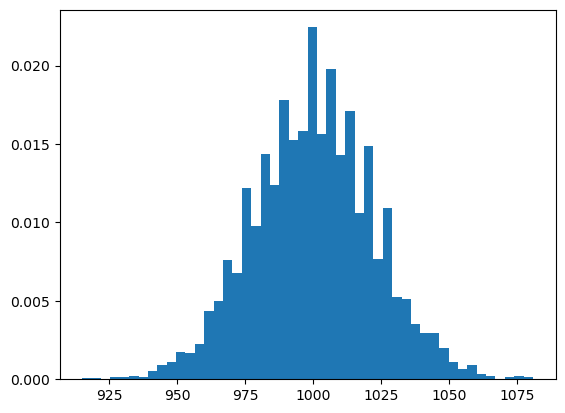

In [188]:
plt.hist(poss_rvs, bins='auto', density=True)
plt.show()

In [115]:
one_half = np.zeros(f-1) 
second_half = np.ones(31)

valve_half = np.zeros(f2-1)
valve_half2 = np.ones(31)

xs = np.concatenate((one_half, second_half))
xss = np.concatenate((valve_half, valve_half2))

con_ = np.concatenate((xs, xss))

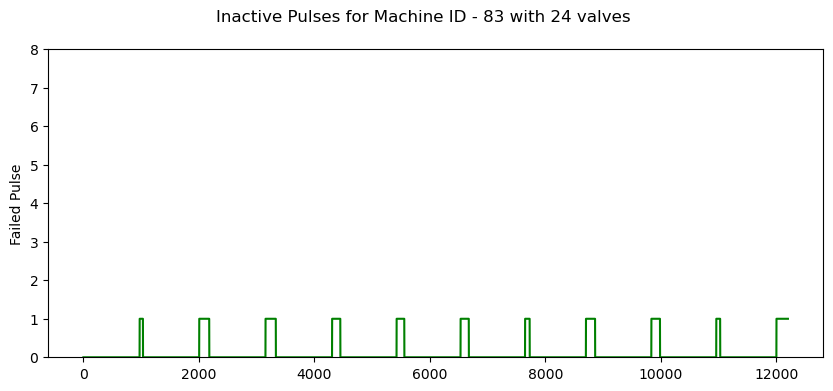

In [237]:
fig,ax = plt.subplots(figsize=(10,4), sharex=True)
# title
fig.suptitle("Inactive Pulses for Machine ID - 83 with 24 valves")
ax.set_ylim([0, 8])
ax.set_ylabel("Failed Pulse", color="black", fontsize=10)
ax.plot(v_one_failures, color='green')


In [180]:
o = np.ones(10)
b = np.ones(5)

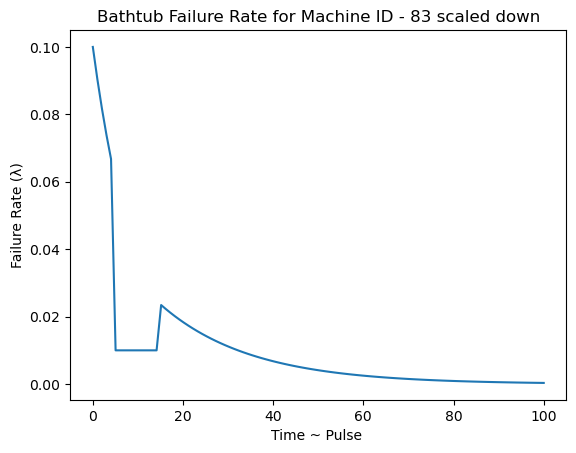

In [309]:
import numpy as np
import matplotlib.pyplot as plt

def bathtub_pdf(t, λ1, λ2, λ3, t1, t2):
    if t < t1:
        return λ1*np.exp(-λ1*t)
    elif t1 <= t <= t2:
        return λ2
    elif t > t2:
        return λ3*np.exp(-λ3*t)
    else:
        return None

# Example usage:
t = np.linspace(0, 100, 100)
λ1, λ2, λ3 = 0.1, 0.01, 0.05
t1, t2 = 5, 15
y = [bathtub_pdf(x, λ1, λ2, λ3, t1, t2) for x in t]

plt.plot(t, y)
plt.title('Bathtub Failure Rate for Machine ID - 83 scaled down')
plt.xlabel('Time ~ Pulse ')
plt.ylabel('Failure Rate (λ)')
plt.show()


In [307]:
np.linspace(0, 10)

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])